# Files uploaded with help of Dropbox

In [ ]:
! wget https://www.dropbox.com/s/6hvn9x6le3nfpra/fashion-mnist_train.csv?dl=0

In [ ]:
 ! wget https://www.dropbox.com/s/r3960rtm2u3ff5l/fashion-mnist_test.csv?dl=0

#Start

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/fashion-mnist_train.csv?dl=0")

In [ ]:
df.shape
# 28 x 28 image , 1 is target vector

(60000, 785)

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = df.iloc[:,1:].values
y_train = df.iloc[:,0].values

In [ ]:
df["label"].nunique()

10

In [ ]:
X_train = X_train/255 #grayscale image
X_train.shape , y_train.shape

((60000, 784), (60000,))

In [ ]:
def print_img(img):
  img = img.reshape(28,28)
  plt.imshow(img,cmap ="gray")

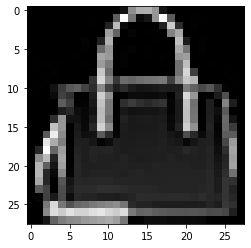

In [ ]:
  print_img(X_train[11])
  #print(y_train[0])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
y_train = one.fit_transform(y_train.reshape(-1,1)).toarray()
y_train.shape
# no of classes =10

(60000, 10)

# Nueral Networking


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [ ]:
input_shape = (784,)
output_shape = 1

In [ ]:
#model initalization/ model created
model = Sequential()

In [ ]:
#first layer
model.add(Dense( units=256, activation='relu', input_shape =(784,) ))
model.add(Dropout(rate = 0.25))

In [ ]:
#hidden layer
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(rate = 0.25))

In [ ]:
#output layer
model.add(Dense(units=10,activation='softmax'))


In [ ]:
#model compilation
model.compile(optimizer='adam' , loss= 'categorical_crossentropy',metrics=['accuracy'] )

In [ ]:
 #model summary
 model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train ,y_train ,batch_size=128 , epochs= 20 , validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 51us/step - loss: 0.6059 - accuracy: 0.7842 - val_loss: 0.4234 - val_accuracy: 0.8443
Epoch 2/20
48000/48000 [==============================] - 2s 47us/step - loss: 0.4285 - accuracy: 0.8439 - val_loss: 0.3886 - val_accuracy: 0.8562
Epoch 3/20
48000/48000 [==============================] - 2s 46us/step - loss: 0.3884 - accuracy: 0.8578 - val_loss: 0.3556 - val_accuracy: 0.8703
Epoch 4/20
48000/48000 [==============================] - 2s 47us/step - loss: 0.3609 - accuracy: 0.8674 - val_loss: 0.3772 - val_accuracy: 0.8627
Epoch 5/20
48000/48000 [==============================] - 2s 47us/step - loss: 0.3437 - accuracy: 0.8729 - val_loss: 0.3339 - val_accuracy: 0.8799
Epoch 6/20
48000/48000 [==============================] - 2s 47us/step - loss: 0.3305 - accuracy: 0.8790 - val_loss: 0.3421 - val_accuracy: 0.8820
Epoch 7/20
48000/48000 [==============================] - 2s 47us/st

In [ ]:
model.evaluate(X_train,y_train)

60000/60000 [==============================] - 4s 67us/step


[0.22965020075539747, 0.9146666526794434]

In [ ]:
 model.history.history

{'accuracy': [0.7841667,
  0.8438542,
  0.85777086,
  0.8673958,
  0.872875,
  0.87895834,
  0.88266665,
  0.8847708,
  0.8870208,
  0.88970834,
  0.894625,
  0.8931875,
  0.896875,
  0.899125,
  0.9,
  0.90275,
  0.9041042,
  0.90608335,
  0.90833336,
  0.9093958],
 'loss': [0.6059449749787649,
  0.4285191919803619,
  0.38835782980918887,
  0.36092731324831645,
  0.3437333732843399,
  0.33049252382914224,
  0.32027971164385477,
  0.31216760516166686,
  0.3011820861498515,
  0.2954174977938334,
  0.2841500238577525,
  0.2828484896818797,
  0.27373352932929995,
  0.2666301281054815,
  0.26156514569123585,
  0.2583465963602066,
  0.2522964769800504,
  0.24694673228263855,
  0.24508642037709555,
  0.24090036378304164],
 'val_accuracy': [0.8442500233650208,
  0.856166660785675,
  0.8703333139419556,
  0.862666666507721,
  0.8799166679382324,
  0.8820000290870667,
  0.8809999823570251,
  0.8818333148956299,
  0.8860833048820496,
  0.8808333277702332,
  0.890916645526886,
  0.883833348751068

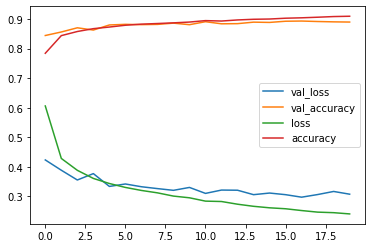

In [ ]:
pd.DataFrame(model.history.history).plot()
plt.show()

# Testing set


In [ ]:
df_test = pd.read_csv("/content/fashion-mnist_test.csv?dl=0")

In [ ]:
df_test.shape

(10000, 785)

In [ ]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values
X_test.shape , y_test.shape

((10000, 784), (10000,))

In [ ]:
X_test = X_test/255

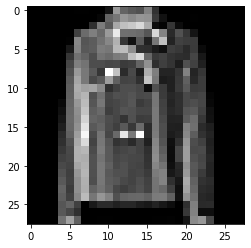

In [ ]:
print_img(X_test[11])

In [ ]:
one2 = OneHotEncoder()
y_test = one2.fit_transform(y_test.reshape(-1,1)).toarray()
y_test.shape

(10000, 10)

In [ ]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 66us/step


[0.30947948288917543, 0.8878999948501587]

In [ ]:
pred1 = model.predict(X_test)

In [ ]:
type(pred1)

numpy.ndarray

In [ ]:
pred1.shape

(10000, 10)